In [1]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../")
import torch
import time
import pickle
import numpy as np
import defmod as dm
import defmod.multimodule_usefulfunctions as mm 
import matplotlib.pyplot as plt
import defmod.registrationdata as regdata
import defmod.hamiltonian_multishape as hamiltonian
from defmod.energyfunctional import EnergyFunctional_unconstrained, EnergyFunctional
from defmod import optimize
import defmod.save_res as results

from matplotlib import animation

torch.set_default_tensor_type(torch.DoubleTensor)

In [2]:

from defmod.attachement import L2NormAttachement
def attach(modules, target):
    return sum([L2NormAttachement()( modules.module_list[i][0].manifold.gd, target[i]) for i in range(len(target))])
    
path = '../results/circles_translation/MultiShapeDefmod/params.p'

In [3]:
p = pickle.load( open( path, "rb" ) )

In [4]:
H = p['Hamiltonian']

In [5]:
x = p['iter_states'][-1]
mom = torch.tensor(x).view(-1)
gd = H.module.manifold.gd

In [6]:
H.module.manifold.fill_gd(gd)
H.module.manifold.fill_cotan(mom)
H.geodesic_controls()

../defmod/multishape.py:208: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  lambda_qp,_ = torch.gesv(B, A)


In [9]:
H.module.module_list[0].module_list

In [44]:
states, controls = dm.shooting.shoot_euler(H, it=60)

../defmod/multishape.py:208: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  lambda_qp,_ = torch.gesv(B, A)


In [63]:
plt.close('all')

/home/kowalewski/anaconda3/envs/py35env/lib/python3.5/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x288 with 0 Axes>

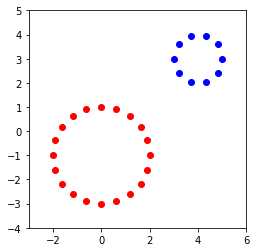

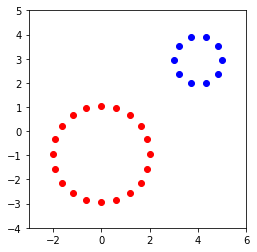

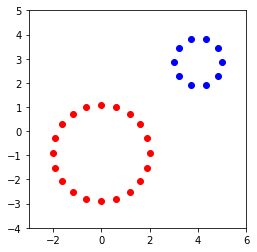

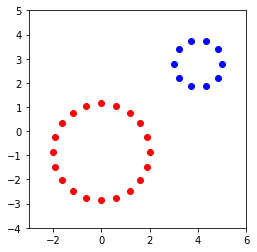

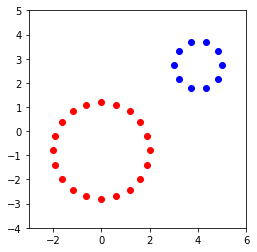

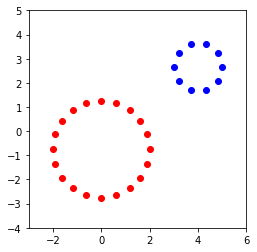

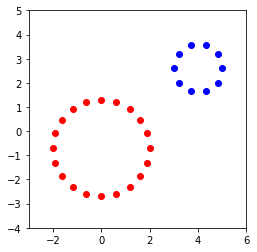

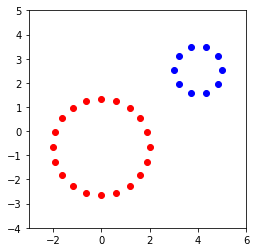

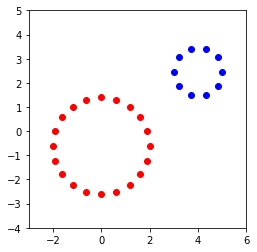

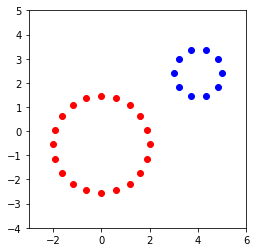

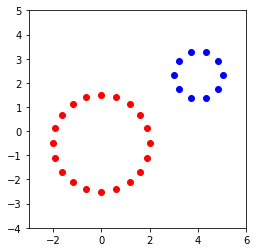

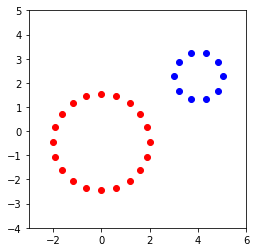

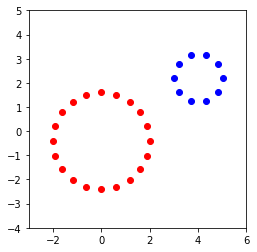

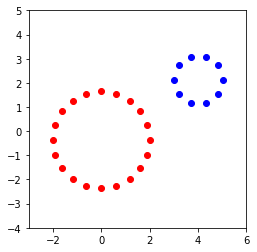

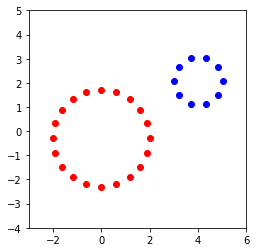

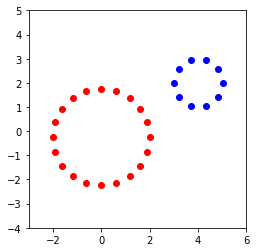

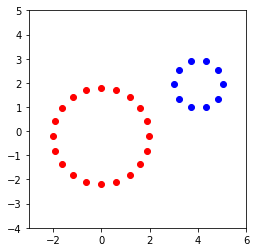

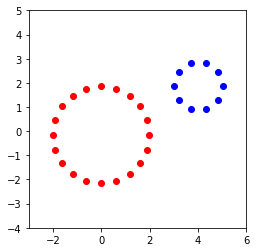

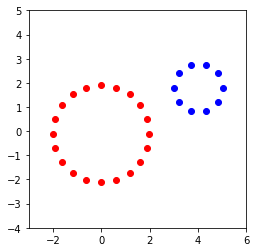

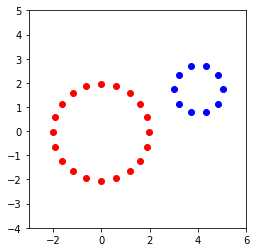

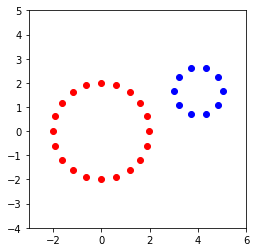

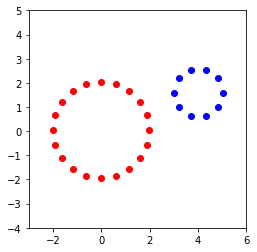

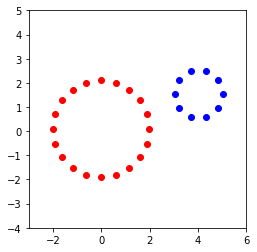

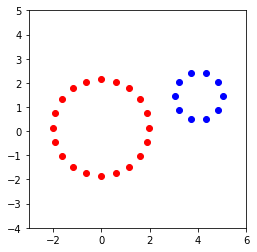

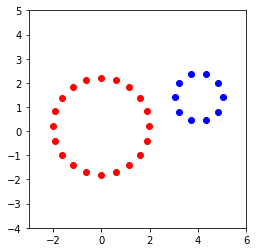

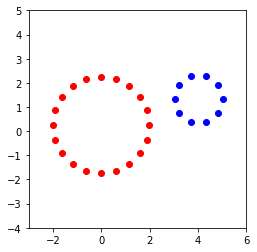

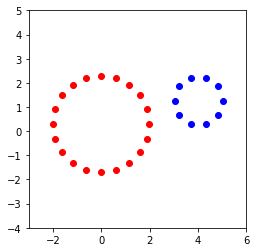

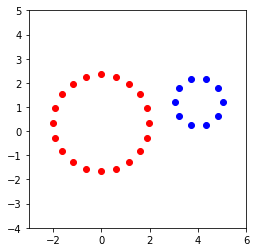

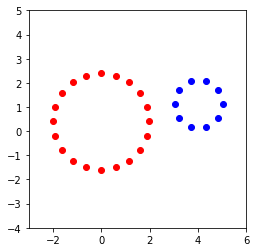

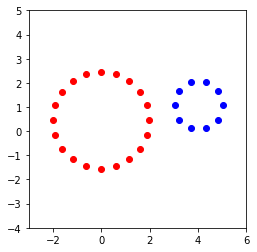

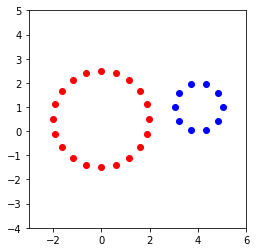

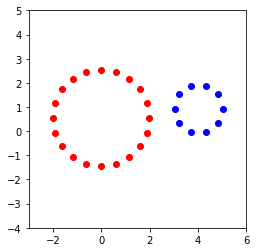

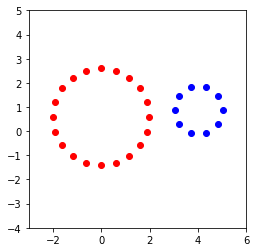

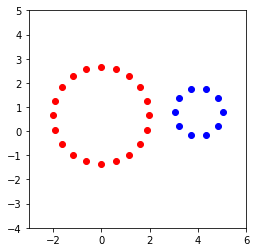

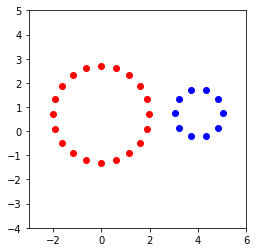

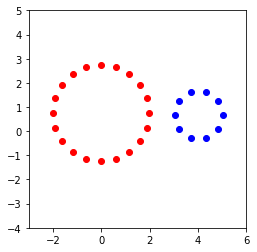

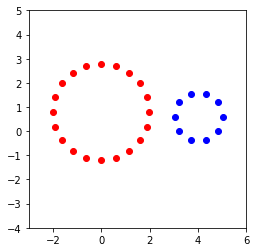

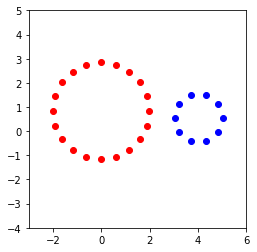

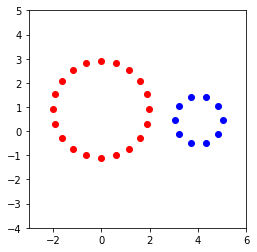

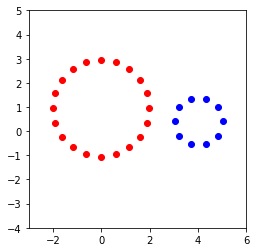

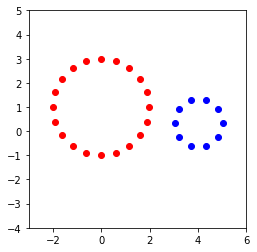

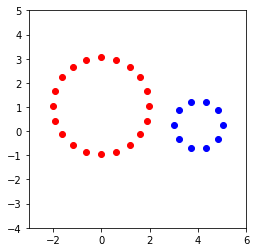

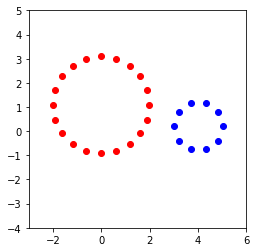

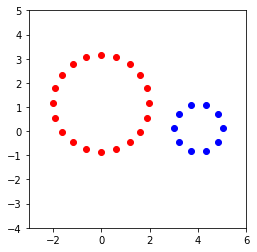

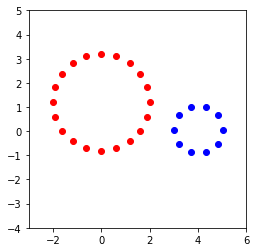

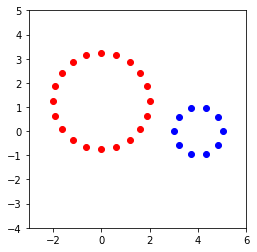

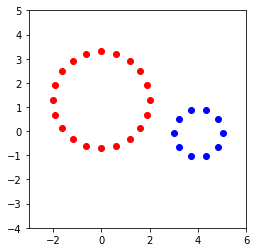

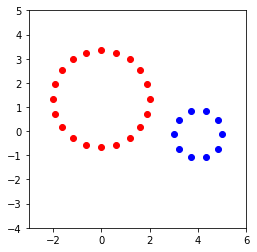

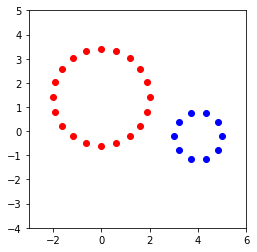

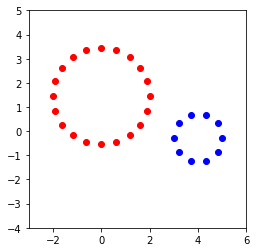

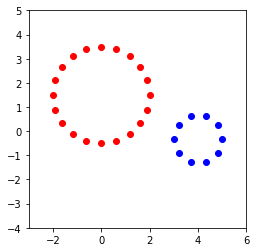

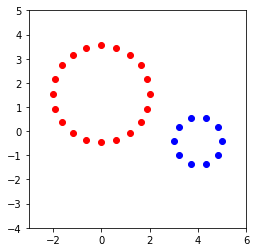

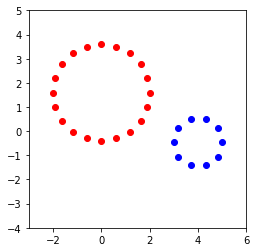

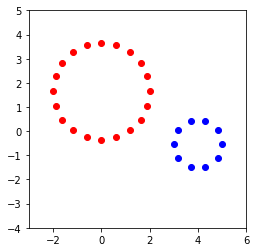

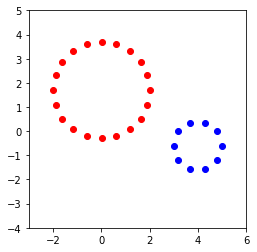

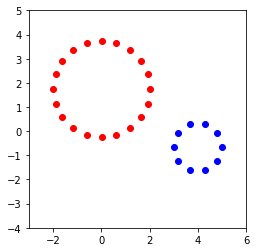

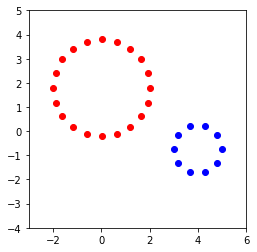

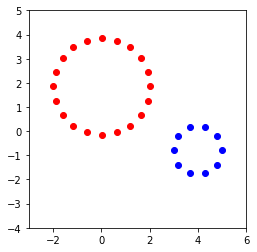

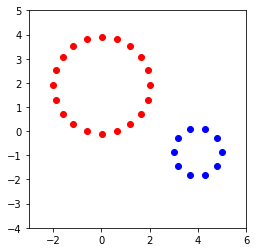

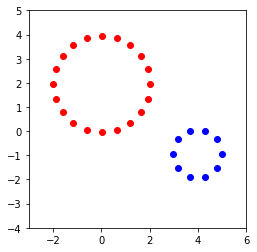

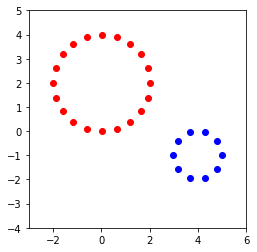

In [67]:
plt.figure()
c = ['r', 'b']

fig_list = []
for s in states:
    fig = plt.figure()
    for i in range(2):

        plt.scatter(s[i][0].gd.detach().view(-1,2).numpy()[:,0], s[i][0].gd.detach().view(-1,2).numpy()[:,1], c=c[i])
    #plt.axis('equal')
    plt.axis('scaled')
    axes = plt.gca()
    axes.set_xlim([-3, 6])
    axes.set_ylim([-4,5])
    fig_list.append(fig)


In [71]:
for fig,i in zip(fig_list, range(len(fig_list))):
    path = '../results/circles_translation/MultiShapeDefmod/shooting/'
    path = "%s%d%s" % (path, 10+i, '.png')
    print(path)
    fig.savefig(path)

../results/circles_translation/MultiShapeDefmod/shooting/10.png
../results/circles_translation/MultiShapeDefmod/shooting/11.png
../results/circles_translation/MultiShapeDefmod/shooting/12.png
../results/circles_translation/MultiShapeDefmod/shooting/13.png
../results/circles_translation/MultiShapeDefmod/shooting/14.png
../results/circles_translation/MultiShapeDefmod/shooting/15.png
../results/circles_translation/MultiShapeDefmod/shooting/16.png
../results/circles_translation/MultiShapeDefmod/shooting/17.png
../results/circles_translation/MultiShapeDefmod/shooting/18.png
../results/circles_translation/MultiShapeDefmod/shooting/19.png
../results/circles_translation/MultiShapeDefmod/shooting/20.png
../results/circles_translation/MultiShapeDefmod/shooting/21.png
../results/circles_translation/MultiShapeDefmod/shooting/22.png
../results/circles_translation/MultiShapeDefmod/shooting/23.png
../results/circles_translation/MultiShapeDefmod/shooting/24.png
../results/circles_translation/MultiShap

In [73]:
from defmod.multimodule_usefulfunctions import point_labels, gridpoints, plot_grid, plot_MultiGrid

xmin, xmax = [-3,6]
ymin, ymax = [-4,5]
dx, dy = 0.2, 0.2
nx = int((xmax-xmin)/dx)
ny = int((ymax-ymin)/dy)
x,y,gridpts = gridpoints(xmin, xmax, ymin, ymax, dx, dy)


In [76]:
H.module.manifold.fill_gd(gd)
H.module.manifold.fill_cotan(mom)
H.geodesic_controls()

states_grid ,_, points = dm.shooting.shoot_euler_silent(H, gridpts, it=60)

../defmod/multishape.py:208: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  lambda_qp,_ = torch.gesv(B, A)
../defmod/multishape_silentpoints.py:221: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  lambda_qp,_ = torch.gesv(B, A)


In [80]:
points[0]

[tensor([[-3.0000, -4.0000],
         [-3.0000, -3.8000],
         [-3.0000, -3.6000],
         ...,
         [ 5.8000,  4.4000],
         [ 5.8000,  4.6000],
         [ 5.8000,  4.8000]], grad_fn=<ViewBackward>),
 tensor([[-3.0000, -4.0000],
         [-3.0000, -3.8000],
         [-3.0000, -3.6000],
         ...,
         [ 5.8000,  4.4000],
         [ 5.8000,  4.6000],
         [ 5.8000,  4.8000]], grad_fn=<ViewBackward>),
 tensor([[-3.0000, -4.0000],
         [-3.0000, -3.8000],
         [-3.0000, -3.6000],
         ...,
         [ 5.8000,  4.4000],
         [ 5.8000,  4.6000],
         [ 5.8000,  4.8000]], grad_fn=<ViewBackward>)]

In [85]:
plt.figure()
c = ['r', 'b']

xlim = [-3, 6]
ylim = [-4,5]

fig_list = []
for s in points:
    fig = plt.figure()
    for i in range(2):
        x1, y1 = dm.usefulfunctions.vec2grid(s[0], nx,ny)
        x2, y2 = dm.usefulfunctions.vec2grid(s[1], nx,ny)
        x3, y3 = dm.usefulfunctions.vec2grid(s[2], nx,ny)
        #x,y = points
        plot_MultiGrid([[x1,y1], [x2,y2], [x3,y3]], [x, y], xlim=xlim, ylim=ylim,label=label)
        #plot_grid(x1.detach().numpy(), y1.detach().numpy(), color = 'blue', xlim=xlim, ylim=ylim, figsize=self.__figsize, dpi=self.__dpi)
        #plt.scatter(s[i][0].gd.detach().view(-1,2).numpy()[:,0], s[i][0].gd.detach().view(-1,2).numpy()[:,1], c=c[i])
    #plt.axis('equal')
    plt.axis('scaled')
    axes = plt.gca()
    axes.set_xlim([-3, 6])
    axes.set_ylim([-4,5])
    fig_list.append(fig)


NameError: name 'label' is not defined

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>